In [1]:
from gym import make
from train import DQN
import numpy as np
from itertools import product
from matplotlib import pyplot as plt
import pandas as pd
import joblib
import seaborn as sns
sns.set()

In [2]:
def plot(log):
    fig, ax = plt.subplots(figsize=(12, 8))
    cfg = (f'alpha: {log["alpha"][0]} | '
           f'gamma: {log["gamma"][0]} | '
           f'eps: {log["eps_max"][0]}, {log["eps_min"][0]} | '
           f'buffer: {log["buffer_size"][0]} | '
           f'batch: {log["batch_size"][0]} | '
           f'tau: {log["tau"][0]}')
    ax.set_title(f"Mean reward over 10 episodes @ {cfg}")
    ax.set_xlabel("№ of transitions")
    ax.set_ylabel("Mean reward")

    plt.hlines(200, np.min(log["step"]), np.max(log["step"]),
               colors="r", label="Solved")

    plt.plot(log["step"],
             log["reward_mean"],
             label="DQN")

    plt.fill_between(log["step"],
                     log["reward_mean"] - log["reward_std"],
                     log["reward_mean"] + log["reward_std"], alpha=0.5)
    plt.legend()
    plt.show()

def collect_data(alpha, gamma, eps_max, eps_min,
                 start_training,
                 buffer_size,
                 batch_size,
                 hidden_size,
                 tau):
    env = make("LunarLander-v2")
    agent = DQN(env=env,
                state_dim=env.observation_space.shape[0], 
                action_dim=env.action_space.n, 
                alpha=alpha, 
                gamma=gamma, 
                hidden_size=hidden_size, 
                tau=tau)
    
    return agent, pd.DataFrame(agent.train(1_000_000,
                                           buffer_size=buffer_size,
                                           batch_size=batch_size,
                                           eps_max=eps_max,
                                           eps_min=eps_min,
                                           start_training=start_training
                                           ))

def print_info(log):
    r_max_idx = np.argmax(log["reward_mean"])
    print(f"Max mean reward {log['reward_mean'][r_max_idx]} @ {log['step'][r_max_idx]}")

step: 500000 | Rmean = 257.2831 | Rstd = 44.6071: 100%|██████████| 500000/500000 [27:23<00:00, 304.17it/s]


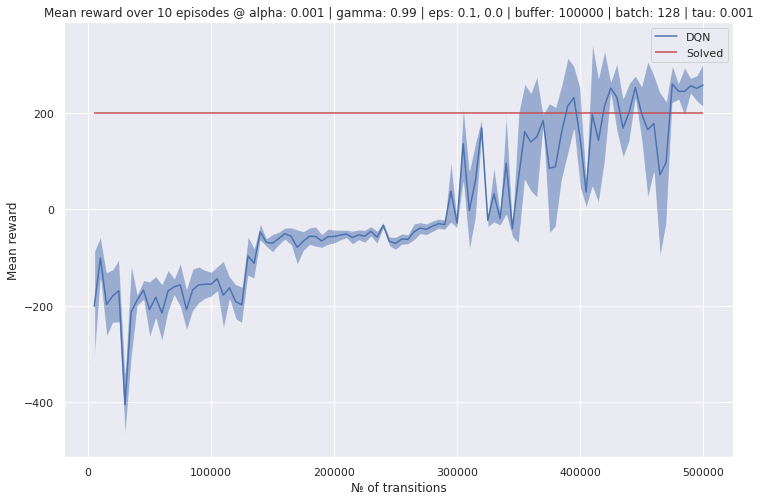

Max mean reward 259.5781889020638 @ 474999


(217.68063286012887, 113.1107364369441)

In [3]:
config = {
    "alpha": 1e-3,
    "gamma": 0.99,
    "buffer_size": 100000,
    "batch_size": 128,
    "start_training": 10000,
    "eps_max": 0.1,
    "eps_min": 0.,
    "hidden_size": 32,
    "tau": 1e-3
}

agent, log = collect_data(**config)
plot(log)
print_info(log)
agent.evaluate_policy(100)